aa

# Question 2 - Generating n by n Matrix

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Generate n by n matrix with every element is in range of (-1,1)
def generateMat(n):
    A = np.random.uniform(-1,1,(n,n))
    return A

Testing generating matrices

CASE 1: 3 by 3 matrix

In [3]:
generateMat(3)

array([[-0.24305852, -0.58573764,  0.58270736],
       [ 0.14627673, -0.16522578,  0.10735327],
       [ 0.55809359, -0.27896141, -0.95524724]])

CASE 2: 5 by 5 matrix

In [4]:
generateMat(5)

array([[-0.12123267, -0.58494122,  0.54569199, -0.39129302, -0.94961931],
       [ 0.8626257 , -0.86276036, -0.43924319,  0.74244464,  0.98521456],
       [ 0.47492763, -0.20120397, -0.2389879 , -0.09075905,  0.61336079],
       [-0.44391824, -0.24737418, -0.02615063, -0.76780324, -0.40557353],
       [ 0.01616841,  0.87725051,  0.46770321, -0.09106849,  0.52911537]])

# Question 3 - Implementing Gaussian Elimination with partial pivoting

In [5]:
#Gaussian Elimination with partial pivoting
def GEPP(B):
    n = len(B)
    # Do this for all k, k in 0 to n-1
    for k in range (0,n-1):
        #k-th pivot
        ##print ("%sth row pivot" % k)
        max = abs(B[k][k])
        j = k
        for i in range (k+1,n):
            if (max < abs(B[i][k])):
                max = abs(B[i][k])
                j = i
        #swap rows
        if (k!=j):
            ##print ("%sth row is swapped" % j)
            B[[j,k]]=B[[k,j]]
        ##else:
            ##print ("no swapping is done")
        ##for b in range(0,n):
            ##print(B[b])
        #elimination
        ## print ("elimination")
        for i in range (k+1,n):
            m = B[i][k]/B[k][k]
            for j in range (k+1,n):
                B[i][j] = B[i][j]-B[k][j]*m
            B[i][k] = 0

In [6]:
#Print matrix
def printMat(A):
    n = len(A)
    for b in range(0,n):
        print(A[b])

Testing Gaussian Elimination of n by n matrices

CASE 1: n = 4

In [7]:
#Generate 4 by 4 matrix
n = 4
print('%d by %d Matrix A is' % (n, n))
A=generateMat(n)
printMat(A)
#Apply GEPP to A
print('After applying GEPP to A')
GEPP(A)
printMat(A)

4 by 4 Matrix A is
[-0.90721661 -0.02742816 -0.2510241  -0.7619461 ]
[ 0.57297506 -0.00518523  0.36253714  0.10710743]
[-0.37169163  0.13023187  0.16199851  0.76467758]
[0.91710865 0.31643166 0.7242166  0.7739728 ]
After applying GEPP to A
[0.91710865 0.31643166 0.7242166  0.7739728 ]
[0.         0.28559042 0.46538101 0.00367853]
[ 0.          0.          0.24067462 -0.37382854]
[0.         0.         0.         1.12832802]


CASE 2: n = 7

In [8]:
#Generate 7 by 7 matrix
n = 7
print('%d by %d Matrix A is' % (n, n))
A=generateMat(n)
printMat(A)
#Apply GEPP to A
print('After applying GEPP to A')
GEPP(A)
printMat(A)

7 by 7 Matrix A is
[ 0.73126095  0.64498707 -0.08234226 -0.86086044 -0.80804201 -0.32014692
  0.5310596 ]
[ 0.46997799  0.79300949 -0.06740895  0.3603175   0.41627598 -0.09554662
  0.56736017]
[ 0.94079695  0.3395945  -0.63331406 -0.13334729  0.44685505 -0.61138727
  0.30020565]
[ 0.92359146 -0.67286564 -0.91169015 -0.82710099  0.51601406  0.99532405
 -0.23066425]
[-0.99228303  0.74729159 -0.41125214  0.11297196 -0.20691487  0.64596414
  0.22252622]
[ 0.73653602  0.32443991 -0.41710485 -0.76640709 -0.30648131 -0.20252611
 -0.41764733]
[ 0.06425587  0.58703151 -0.71014831 -0.42117169  0.26739858  0.37711797
  0.81811498]
After applying GEPP to A
[-0.99228303  0.74729159 -0.41125214  0.11297196 -0.20691487  0.64596414
  0.22252622]
[ 0.          1.19570208 -0.38541369 -0.77760598 -0.9605275   0.15589503
  0.69504985]
[ 0.          0.         -1.28715798 -0.70719085  0.34165359  1.59361198
 -0.03673444]
[0.         0.         0.         1.10065931 1.26817575 0.19396878
 0.00297615]
[ 0.  

# Question 4 - Plotting growth factor vs matrix size

Given the factorization $PA=LU$, the growth factor is defined as
$$ g(A)= \frac{max_{i,j}|u_{ij}|}{max_{i,j}|a_{ij}|} $$
where $ u_{ij}$ and $a_{ij}$ are the elements of $U$ and $A$ respectively.

To calculate $g(A)$ we first need to generate a matrix. Inspect every abosulte value of elements and find ${max_{i,j}|a_{ij}|}$.
Then, apply Gaussian elimination. Now, we can find ${max_{i,j}|u_{ij}|}$ and apply it on $\frac{max_{i,j}|u_{ij}|}{max_{i,j}|a_{ij}|}$ to find $g(A)$

In [9]:
#Growth Factor function with parameter n
def growF(n):
    B = generateMat(n)
    a = abs(B).max()
    GEPP(B)
    u = abs(B).max()
    g = u/a
    return g

Example: Find a growth factor of a 4 by 4 matrix

In [10]:
growF(4)

1.0

Now, we are going to plot growth factor vs matrix size.

The x-axis represents the matrix size n

The y-axis represents the growth facor of a n by n matrix in logarithmic scale

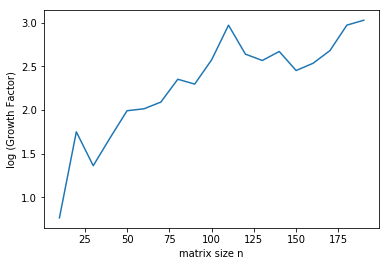

In [11]:
x = np.arange(10,200,10)
y = []
for k in range(10,200,10):
    y.append(growF(k))
plt.plot(x,np.log(y))
plt.xlabel('matrix size n')
plt.ylabel('log (Growth Factor)')
plt.show()

If $g{\approx}cn^\alpha$, then $$\log(g){\approx}\log(cn^\alpha)=\log(c)+\alpha \log(n)=C+\alpha \log(n)$$

So, $\alpha$ is the slope of $\log(g)$ vs $\log(n)$ plot.

Now, plot $\log(g)$ vs $\log(n)$ to find a approximated $\alpha$

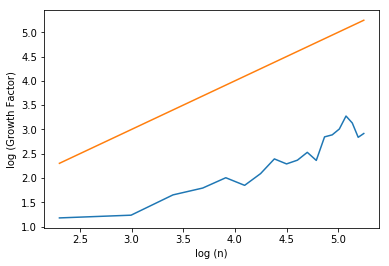

In [12]:
x = np.arange(10,200,10)
z = np.log(x)
y = []
for k in range(10,200,10):
    y.append(growF(k))
plt.plot(z,np.log(y))
plt.plot(z,z)
plt.xlabel('log (n)')
plt.ylabel('log (Growth Factor)')
plt.show()

We clearly see that $\alpha$ is less than 1.

So, $cn^\alpha<cn$.
Compare this with the worst case scenario $g{\approx}2^n$, since $n<2^n$ we see this estimation is better.

# Questino 5 - Probability distribution of the growth factor for a fixed n

CASE 1 : n = 10

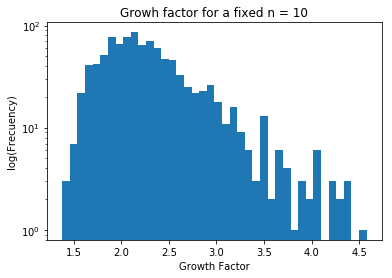

In [13]:
n = 10
y = []
for x in range (0,1000):
    y.append(growF(n))
plt.hist(y ,bins=40)
plt.title('Growh factor for a fixed n = 10')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

Case 2 : n = 16

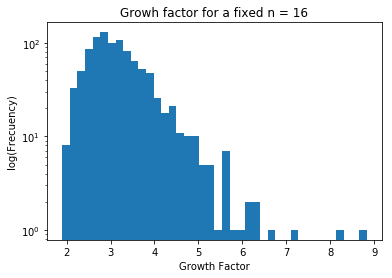

In [14]:
n = 16
y = []
for x in range (0,1000):
    y.append(growF(n))
plt.hist(y ,bins=40)
plt.title('Growh factor for a fixed n = 16')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

Case 3 : n = 20, 40, 80

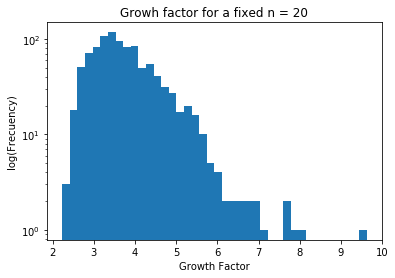

In [15]:
n = 20
y = []
for x in range (0,1000):
    y.append(growF(n))
plt.hist(y ,bins=40)
plt.title('Growh factor for a fixed n = 20')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

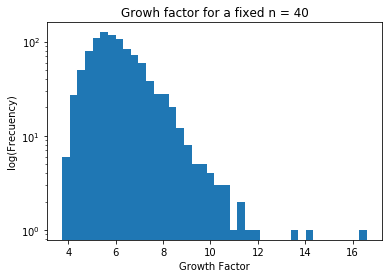

In [ ]:
n = 40
y = []
for x in range (0,1000):
    y.append(growF(n))
plt.hist(y ,bins=40)
plt.title('Growh factor for a fixed n = 40')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

In [ ]:
n = 80
y = []
for x in range (0,1000):
    y.append(growF(n))
plt.hist(y ,bins=40)
plt.title('Growh factor for a fixed n = 80')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

# Question 6 - Repeat Q4, 5 for matrices whose entries are random numbers with a normal distribution

I picked the parameters ($\mu$ and $\sigma$) at my convenience.
$\mu = 3$ and $\sigma^2 =1$

In [ ]:
mu = 3
sigma = 1
def newGenerateMat(n):
    A = np.random.normal(mu,sigma,(n,n))
    return A

Test generating matrix with above entries.

Case : $n = 5$

In [ ]:
newGenerateMat(5)

In [ ]:
#Growth Factor function with parameter n
def newGrowF(n):
    B = newGenerateMat(n)
    a = abs(B).max()
    GEPP(B)
    u = abs(B).max()
    g = u/a
    return g

In [ ]:
newGrowF(4)

# Plotting growth factor vs matrix size

In [ ]:
x = np.arange(10,200,10)
z = np.log(x)
y = []
for k in range(10,200,10):
    y.append(newGrowF(k))
plt.plot(z,np.log(y))
plt.plot(z,z)
plt.xlabel('log (n)')
plt.ylabel('log (Growth Factor)')
plt.show()

# Plotting Histogram

CASE : $n = 10, 16, 20, 40, 80$

In [ ]:
n = 10
y = []
for x in range (0,1000):
    y.append(newGrowF(n))
plt.hist(y ,bins=40)
plt.title('New Growh factor for a fixed n = 10')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

In [ ]:
n = 16
y = []
for x in range (0,1000):
    y.append(newGrowF(n))
plt.hist(y ,bins=40)
plt.title('New Growh factor for a fixed n = 16')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

In [ ]:
n = 20
y = []
for x in range (0,1000):
    y.append(newGrowF(n))
plt.hist(y ,bins=40)
plt.title('New Growh factor for a fixed n = 20')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

In [ ]:
n = 40
y = []
for x in range (0,1000):
    y.append(newGrowF(n))
plt.hist(y ,bins=40)
plt.title('New Growh factor for a fixed n = 40')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()

In [ ]:
n = 80
y = []
for x in range (0,1000):
    y.append(newGrowF(n))
plt.hist(y ,bins=40)
plt.title('New Growh factor for a fixed n = 80')
plt.yscale('log')
plt.xlabel('Growth Factor')
plt.ylabel('log(Frecuency)')
plt.show()